In [1]:
import pandas as pd

df_review = pd.read_csv("all_review.csv")
df_review = df_review.drop(["Unnamed: 0", "Column1", "Column2", "Column3"], axis=1)
df_book = pd.read_csv("all_book.csv")
df_review_labeled = pd.read_csv("all_review_labeled_bi.csv")
df_review_cleaned = pd.read_csv("all_review_preprocessing.csv")
df_book_cleaned = pd.read_csv("all_book_preprocessing.csv")

* If there is book name duplicated, it may be caused by difference of book category.

In [62]:
df_book[df_book["Book_Name"]=="초록지붕집의 앤"]

,Book_Name,Book_Author,Book_Category,Completion_Percent,ReadTogether,ReviewCount,Keyword,AudioBook
3060,초록지붕집의 앤,루시 모드 몽고메리 / 유보라 / 오수원,오디오북,NaN,210개,0,NaN,O
6069,초록지붕집의 앤,루시 모드 몽고메리 / 유보라 / 오수원,소설,완독할 확률 74%,917개,4개,NaN,O


#### Visualization EDA

* Count of data Changing when preprocessing before and after 

In [63]:
print("1. Book")
print('--------------------------------------')
print('Before Preprocessing Book :', len(df_book))
print('After Preprocessing Book :', len(df_book_cleaned))
print('--------------------------------------')
print("2. Review")
print('---------------------------------------')
print('Before Preprocessing Review :', len(df_review))
print('After Preprocessing Review :', len(df_review_cleaned))

1. Book
--------------------------------------
Before Preprocessing Book : 12716
After Preprocessing Book : 8630
--------------------------------------
2. Review
---------------------------------------
Before Preprocessing Review : 22005
After Preprocessing Review : 15568


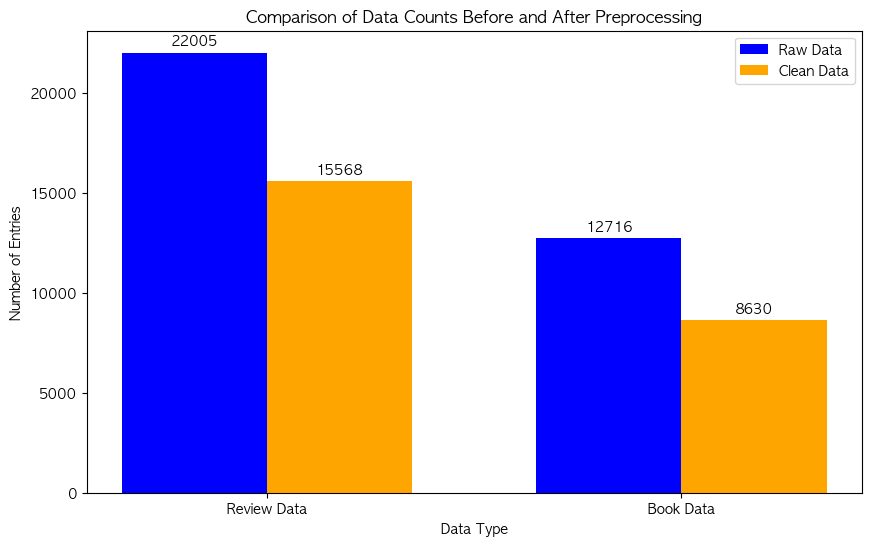

In [64]:
import matplotlib.pyplot as plt

# Placeholder values for demonstration (replace with actual data)
raw_data_review_count = len(df_review)  # Replace with actual count
raw_data_book_count = len(df_book)  # Replace with actual count
clean_data_review_count = len(df_review_cleaned)  # Replace with actual count
clean_data_book_count = len(df_book_cleaned)  # Replace with actual count

categories = ['Review Data', 'Book Data']
raw_data_counts = [raw_data_review_count, raw_data_book_count]
clean_data_counts = [clean_data_review_count, clean_data_book_count]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, raw_data_counts, bar_width, label='Raw Data', color='blue')
bar2 = ax.bar([i + bar_width for i in index], clean_data_counts, bar_width, label='Clean Data', color='orange')

def add_counts_to_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_counts_to_bars(bar1)
add_counts_to_bars(bar2)


ax.set_xlabel('Data Type')
ax.set_ylabel('Number of Entries')
ax.set_title('Comparison of Data Counts Before and After Preprocessing')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.show()


* 카테고리별 책 수량 비교 (전처리 전vs후)

* The "AppleGothic" is Mac-specific font. So, maybe in a Windows environmnt, professor can use "Malgun Gothic". If it does not work, please let me know about it. We will find out.

/var/folders/z9/b0_p9_w56d539_ntgw6cc_xw0000gn/T/ipykernel_32845/1197936001.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Book_Category', data=df_book, order = df_book['Book_Category'].value_counts().index, palette=palette)
/var/folders/z9/b0_p9_w56d539_ntgw6cc_xw0000gn/T/ipykernel_32845/1197936001.py:10: UserWarning: The palette list has more values (103) than needed (102), which may not be intended.
  sns.countplot(y='Book_Category', data=df_book, order = df_book['Book_Category'].value_counts().index, palette=palette)


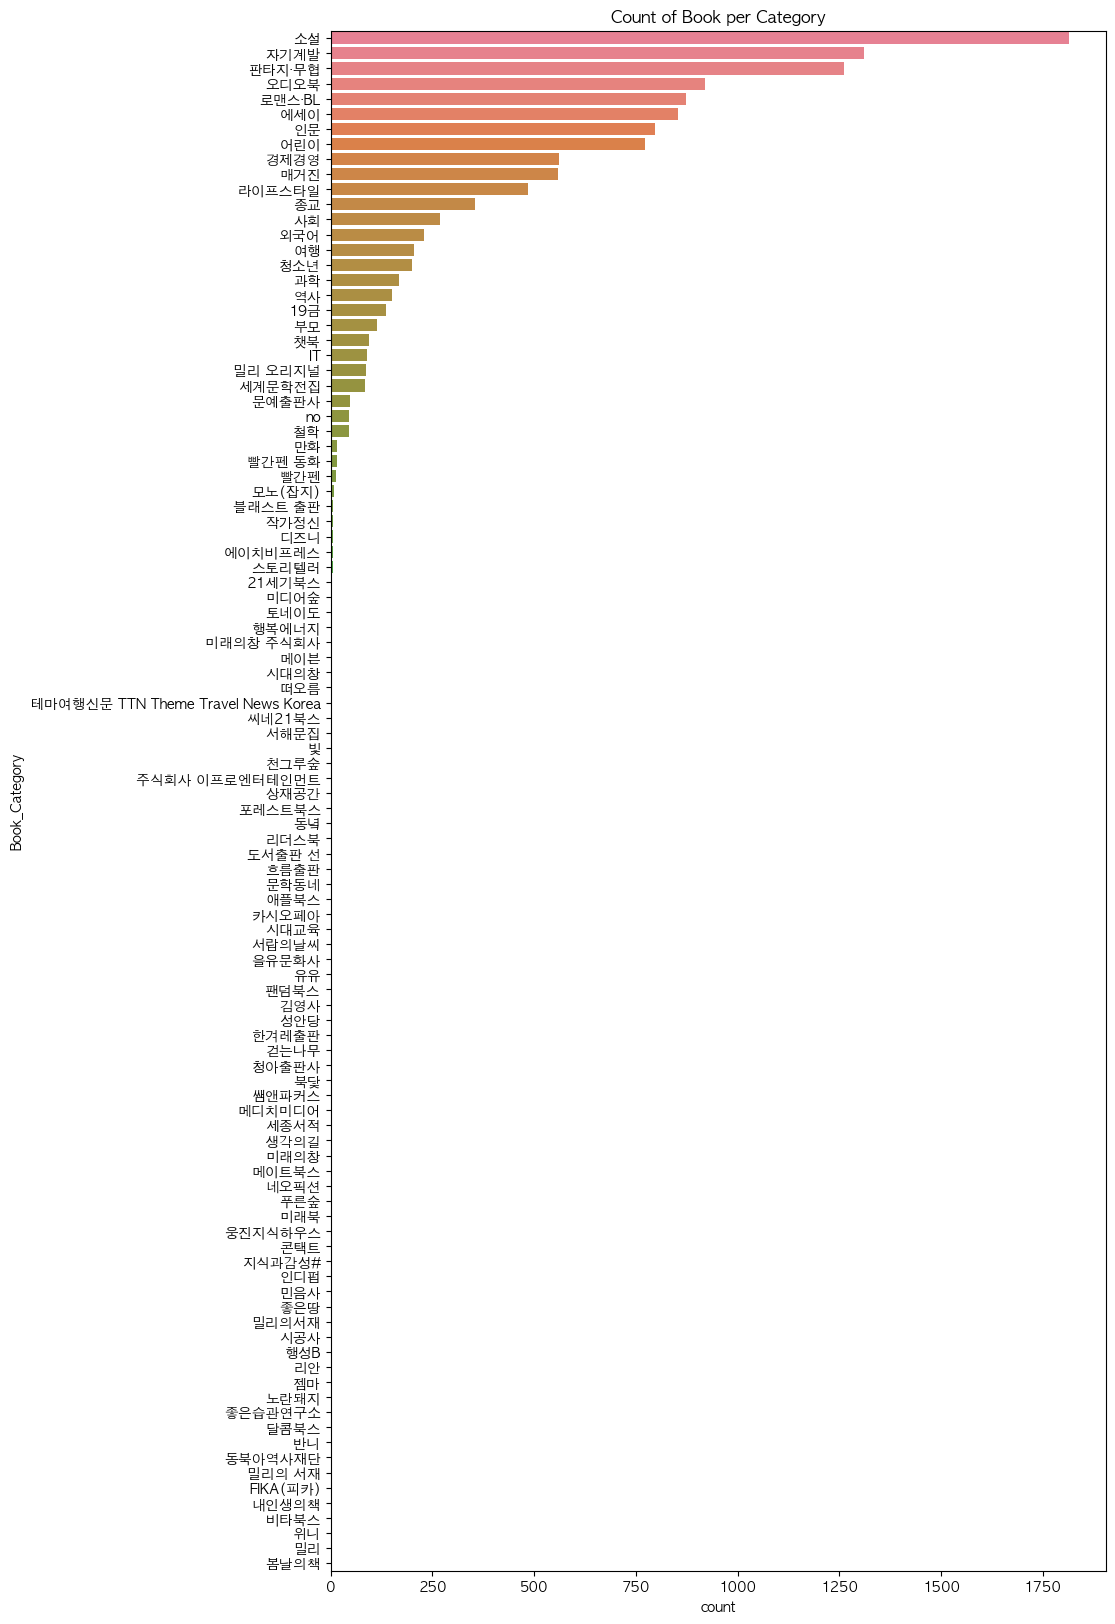

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

palette = sns.color_palette("husl", len(df_book['Book_Category'].unique()))

plt.figure(figsize=(10, 20))
sns.countplot(y='Book_Category', data=df_book, order = df_book['Book_Category'].value_counts().index, palette=palette)
plt.title('Count of Book per Category')
plt.show()

/var/folders/z9/b0_p9_w56d539_ntgw6cc_xw0000gn/T/ipykernel_32845/3013708446.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Book_Category', data=df_book_cleaned, order = df_book_cleaned['Book_Category'].value_counts().index, palette=palette)


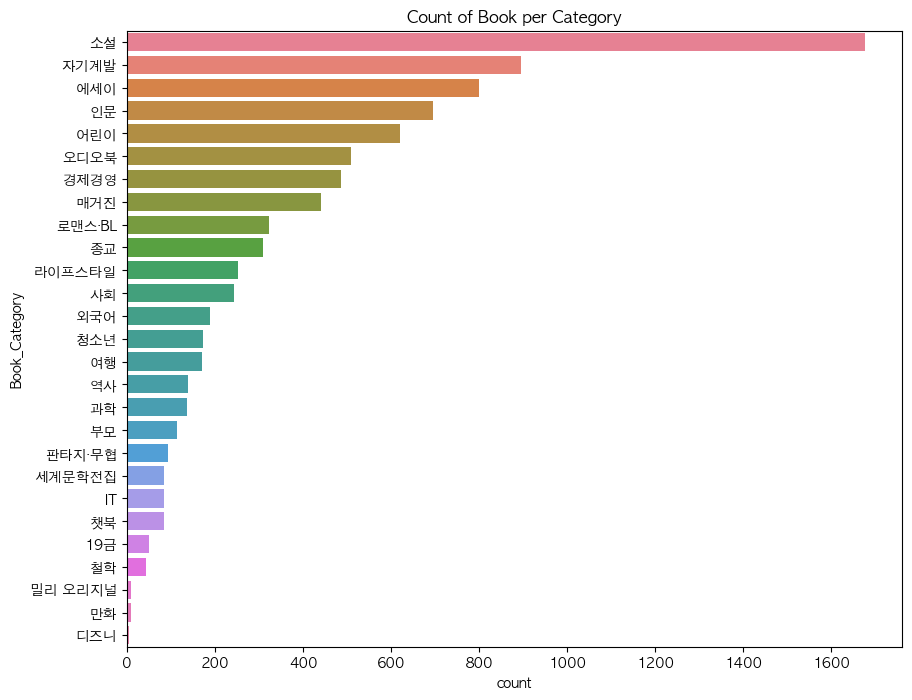

In [5]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

palette = sns.color_palette("husl", len(df_book_cleaned['Book_Category'].unique()))

plt.figure(figsize=(10, 8))
sns.countplot(y='Book_Category', data=df_book_cleaned, order = df_book_cleaned['Book_Category'].value_counts().index, palette=palette)
plt.title('Count of Book per Category')
plt.show()

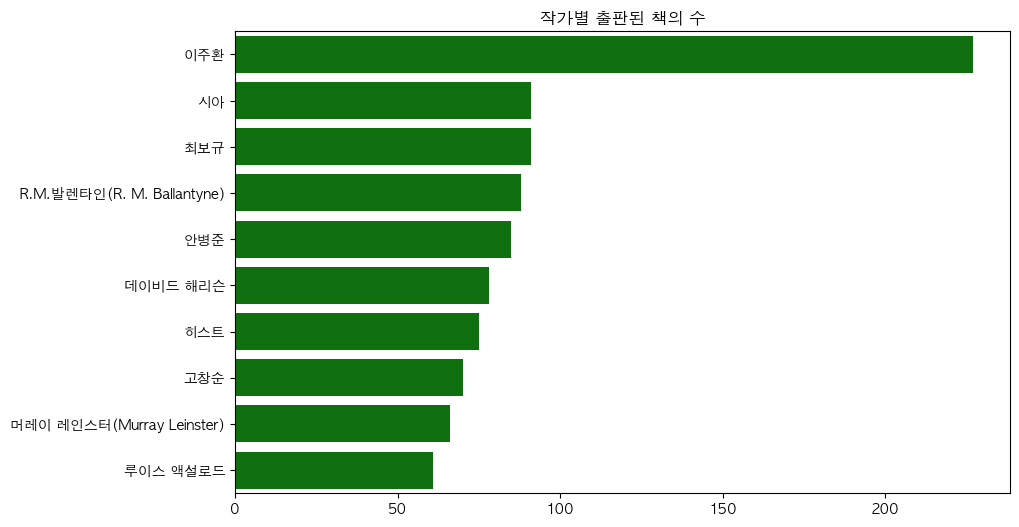

In [67]:
# 저자별 출판된 책의 수 시각화 (상위 10명)
top_authors = df_book['Book_Author'].value_counts().head(10)
palette = sns.color_palette("husl", len(df_book['Book_Author']))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, color = "green")
plt.title('작가별 출판된 책의 수')
plt.show()

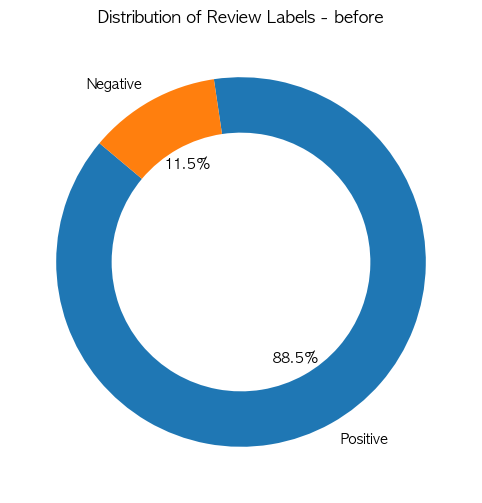

1    19465
0     2540
Name: Label, dtype: int64

In [68]:
import matplotlib.pyplot as plt

label_counts = df_review_labeled['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Review Labels - before')

plt.show()

label_counts


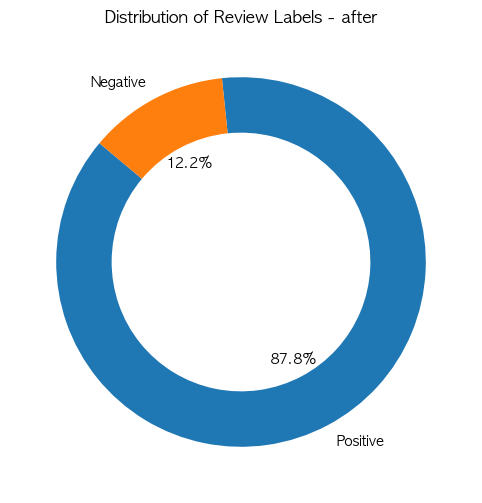

1    13662
0     1906
Name: Label, dtype: int64

In [69]:
import matplotlib.pyplot as plt

label_counts = df_review_cleaned['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Review Labels - after')

plt.show()

label_counts

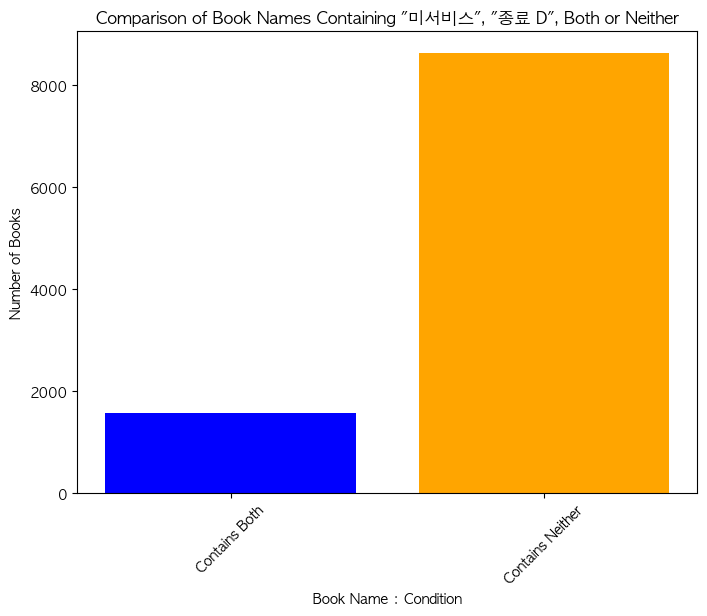

In [70]:
import matplotlib.pyplot as plt

# # '미서비스'만 포함하는 경우의 개수
# contains_miservice_only = len(df_book[df_book['Book_Name'].str.contains('미서비스') & ~df_book['Book_Name'].str.contains('종료 D')])

# # '종료 D~'만 포함하는 경우의 개수
# contains_jongryo_only = len(df_book[~df_book['Book_Name'].str.contains('미서비스') & df_book['Book_Name'].str.contains('종료 D')])

# 둘 다 포함하는 경우의 개수
contains_both = len(df_book[df_book['Book_Name'].str.contains('미서비스') | df_book['Book_Name'].str.contains('종료 D')])

# 둘 다 포함하지 않는 경우의 개수
contains_neither = len(df_book_cleaned)

counts = [ contains_both, contains_neither]

categories = [ 'Contains Both', 'Contains Neither']

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'orange'])
plt.title('Comparison of Book Names Containing "미서비스", "종료 D", Both or Neither')
plt.xlabel('Book Name : Condition')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


* useless review deleting (e.g. '재구매 방지용')

In [71]:
df_review[df_review['Review_Text'].str.contains('방지용') | df_review['Review_Text'].str.contains('재구독 방지')
                    | df_review['Review_Text'].str.contains('재대여 방지') | df_review['Review_Text'].str.contains('재구매 방지')]

,Nickname,Review_Text,Book_Name
436,철무정검,재구매 방지용 입니다,만능돌로 살아가는 법 1권
2203,철무정검,재구매 방지용 입니다,미서비스 \n \n 전능의 뮤...
2204,철무정검,재구매 방지용 입니다,미서비스 \n \n 전능의 뮤...
2285,철무정검,재구매 방지용 입니다,미서비스 \n \n 전능의 뮤...
2906,철무정검,재구매 방지용 입니다,지배자의 반지 2권
...,...,...,...
21891,철무정검,재구매 방지용 입니다,종료 D-3\n \n 삼국지 ...
21892,철무정검,재구매 방지용 입니다,종료 D-3\n \n 삼국지 ...
21893,철무정검,재구매 방지용 입니다,종료 D-3\n \n 삼국지 ...
21894,철무정검,재구매 방지용 입니다,종료 D-3\n \n 삼국지 ...


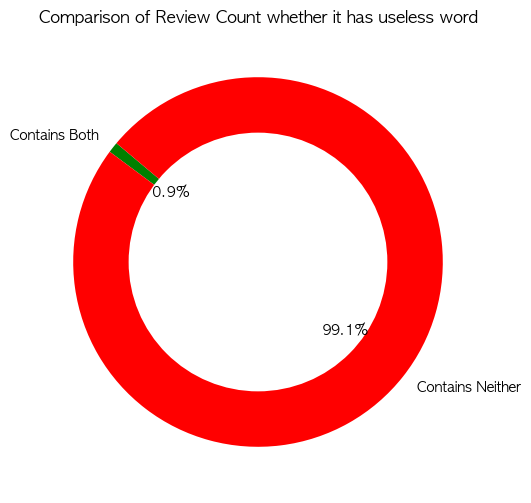

In [72]:
import matplotlib.pyplot as plt

# count of useless words
contains_both = len(df_review[df_review['Review_Text'].str.contains('방지용') | df_review['Review_Text'].str.contains('재구독 방지')
                    | df_review['Review_Text'].str.contains('재대여 방지') | df_review['Review_Text'].str.contains('재구매 방지')])

# count of review after deleting the words 
contains_neither = len(df_review_cleaned) 

counts = [contains_both, contains_neither]
categories = ['Contains Both', 'Contains Neither']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.title('Comparison of Review Count whether it has useless word')
plt.show()


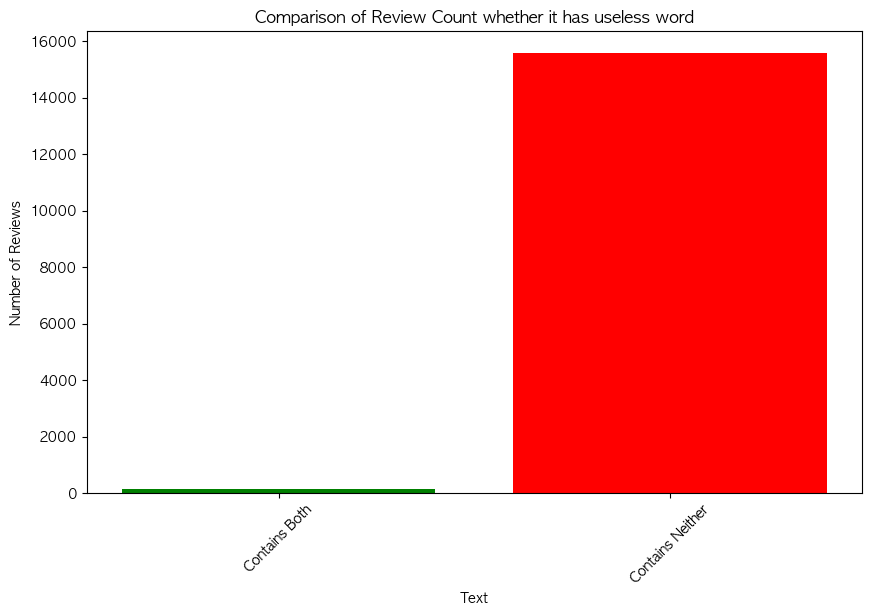

In [73]:
import matplotlib.pyplot as plt

# count of useless words
contains_both = len(df_review[df_review['Review_Text'].str.contains('방지용') | df_review['Review_Text'].str.contains('재구독 방지')
                    | df_review['Review_Text'].str.contains('재대여 방지') | df_review['Review_Text'].str.contains('재구매 방지')])

# count of review after deleting the words 
contains_neither = len(df_review_cleaned) 

counts = [ contains_both, contains_neither]

categories = [ 'Contains Both', 'Contains Neither']

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['green', 'red'])
plt.title('Comparison of Review Count whether it has useless word')
plt.xlabel('Text')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


* compare series book

In [76]:
df_book[df_book['Book_Name'].str.contains('방탄 리더')]

,Book_Name,Book_Author,Book_Category,Completion_Percent,ReadTogether,ReviewCount,Keyword,AudioBook
1160,방탄 리더 의무교육 1 (리더 7대 의무교육 사용 설명서),최보규,자기계발,NaN,1개,0,NaN,X
1161,방탄 리더 의무교육 2 (리더 7대 의무교육 사용 설명서),최보규,자기계발,NaN,1개,0,NaN,X
1162,방탄 리더 의무교육 3 (리더 7대 의무교육 사용 설명서),최보규,자기계발,NaN,1개,0,NaN,X
1163,방탄 리더 의무교육 4 (리더 7대 의무교육 사용 설명서),최보규,자기계발,NaN,1개,0,NaN,X
1164,방탄 리더 의무교육 5 (리더 7대 의무교육 사용 설명서),최보규,자기계발,NaN,1개,0,NaN,X
...,...,...,...,...,...,...,...,...
9216,방탄 리더 동기부여 2 (방탄 동기부여 사관학교),최보규,자기계발,NaN,1개,0,NaN,X
9217,방탄 리더 동기부여 3 (방탄 동기부여 사관학교),최보규,자기계발,NaN,1개,0,NaN,X
9218,방탄 리더 동기부여 4 (방탄 동기부여 사관학교),최보규,자기계발,NaN,1개,0,NaN,X
9219,방탄 리더 동기부여 5 (방탄 동기부여 사관학교),최보규,자기계발,NaN,1개,0,NaN,X


In [75]:
df_book_cleaned[df_book_cleaned['Book_Name'].str.contains('방탄 리더')]

,Book_Name,Book_Author,Book_Category,Completion_Percent,ReadTogether,ReviewCount,AudioBook,Series_Name
726,방탄 리더 의무교육 1 (리더 7대 의무교육 사용 설명서),최보규,자기계발,0.0,1,0,X,방탄 리더 의무교육
729,방탄 리더 태도 1 (태도 동기부여! 태도는 스펙이다!),최보규,자기계발,0.0,9,0,X,방탄 리더 태도
862,방탄 리더 감정컨트롤 1 (리더 스트레스 관리),최보규,자기계발,0.0,1,0,X,방탄 리더 감정컨트롤
866,방탄 리더 재테크 1 (언제까지 몸으로만 일 할 것인가?),최보규,자기계발,0.0,4,0,X,방탄 리더 재테크
2112,방탄 리더 기본기 1 (기본기 동기부여! 기본기는 스펙이다!),최보규,자기계발,0.0,0,0,X,방탄 리더 기본기
2377,방탄 리더 사명감 1 (사명감 동기부여! 사명감은 스펙이다!),최보규,자기계발,0.0,0,0,X,방탄 리더 사명감
2380,방탄 리더 인재 양성 1 (인재 양성 동기부여! 인재 양성 매뉴얼!),최보규,자기계발,0.0,0,0,X,방탄 리더 인재
4312,방탄 리더십 1 (방탄 리더 1명이 10만 명을 변화시킨다!),최보규,자기계발,0.0,1,0,X,방탄 리더십 1
4313,방탄 리더 자존감 2 (방탄 리더 1명이 10만 명을 변화시킨다!),최보규,자기계발,0.0,0,0,X,방탄 리더 자존감
4314,방탄 리더 멘탈 3 (방탄 리더 1명이 10만 명을 변화시킨다!),최보규,자기계발,0.0,2,0,X,방탄 리더 멘탈


* Integration Series Book For EDA
> Made New Data( book_series.csv ) only for EDA

In [77]:
# 종료 및 미서비스 삭제
def delete_rows_containing_text(df, column_name, texts_to_remove):
    for text in texts_to_remove:
        df = df[~df[column_name].str.contains(text, na=False, case=False)]

    return df

texts_to_remove = ['종료 D', '미서비스']
df_book = delete_rows_containing_text(df_book, 'Book_Name', texts_to_remove)
#시리즈 통합
def identify_series_name(book_title, num_words=3):
    # 연속된 num_words 단어를 기준으로 시리즈 이름 생성
    words = book_title.split()
    return ' '.join(words[:num_words]) if len(words) >= num_words else book_title

df_book['Clean_Book_Name'] = df_book['Book_Name'].str.replace(r'\(\w+\)', '').str.replace(r'\d+권|\d+부|\d+화|\(완결\)|\(완료\)', '', regex=True)

df_book['Series_Name'] = df_book['Clean_Book_Name'].apply(lambda x: identify_series_name(x))

/var/folders/0c/33pbnmq11qd14nw6fg49k7sr0000gn/T/ipykernel_37549/2789315840.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df_book['Clean_Book_Name'] = df_book['Book_Name'].str.replace(r'\(\w+\)', '').str.replace(r'\d+권|\d+부|\d+화|\(완결\)|\(완료\)', '', regex=True)


In [78]:
df_book.to_csv('book_series.csv', index=False)

In [79]:
df_series = pd.read_csv("book_series.csv")

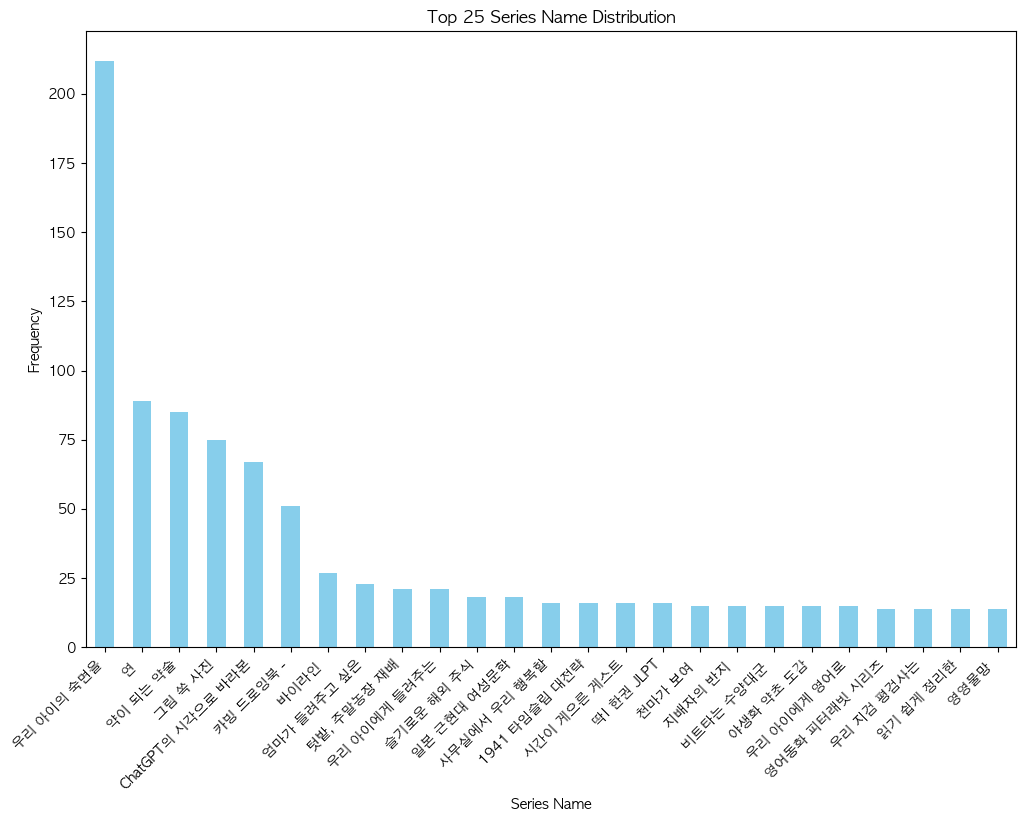

In [80]:
import matplotlib.pyplot as plt

# Calculating the frequency of each series name
series_name_counts = df_series['Series_Name'].value_counts()

top_series_names = series_name_counts.head(25)

plt.figure(figsize=(12, 8))
top_series_names.plot(kind='bar', color='skyblue')
plt.title('Top 25 Series Name Distribution')
plt.xlabel('Series Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [81]:
# statistics about series book name 
series_name_counts = pd.DataFrame(df_series['Series_Name'].value_counts()).reset_index()
series_name_counts.columns = ['Series_Name', 'Frequency']
print("----------------------------------")
print("Max of frequency :", series_name_counts['Frequency'].max())
print("Min of frequency :", series_name_counts['Frequency'].min())
print("----------------------------------")
series_name_counts

----------------------------------
Max of frequency : 212
Min of frequency : 1
----------------------------------


,Series_Name,Frequency
0,우리 아이의 숙면을,212
1,연,89
2,약이 되는 약술,85
3,그림 쏙 사진,75
4,ChatGPT의 시각으로 바라본,67
...,...,...
8641,모두모두 소중해요,1
8642,문어빵 파티에 초대해요,1
8643,나의 마흔에,1
8644,가장 친한 친구니까!,1


* Count Review per Nickname(person)

> Before preprocessing

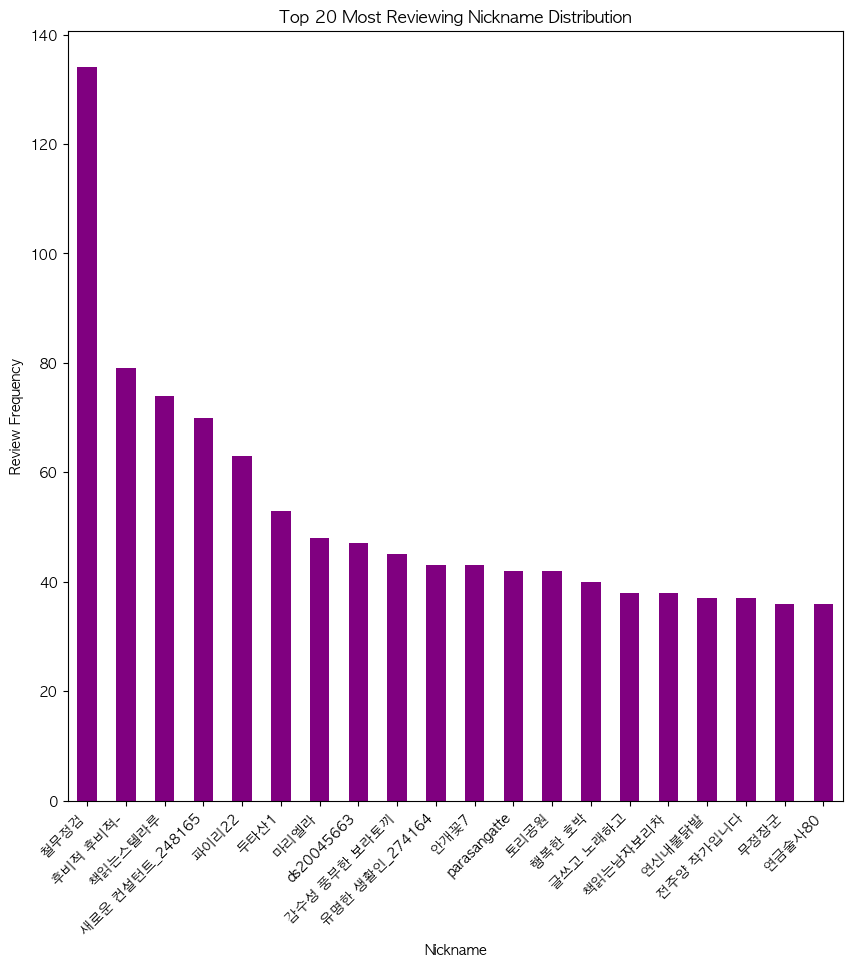

In [87]:
import matplotlib.pyplot as plt

# Calculating the frequency of each series name
nick_name_counts = df_review['Nickname'].value_counts()

top_series_names = nick_name_counts.head(20)

plt.figure(figsize=(10, 10))
top_series_names.plot(kind='bar', color='purple')
plt.title('Top 20 Most Reviewing Nickname Distribution')
plt.xlabel('Nickname')
plt.ylabel('Review Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


> After preprocessing

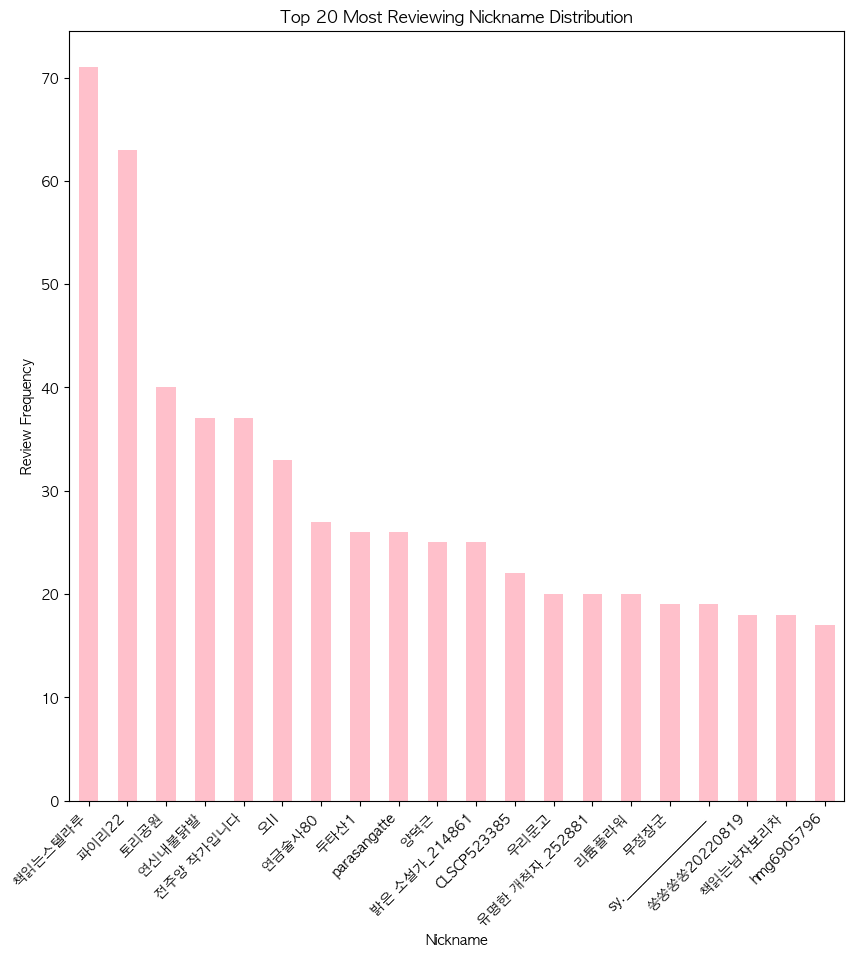

In [86]:
import matplotlib.pyplot as plt

# Calculating the frequency of each series name
nick_name_counts = df_review_cleaned['Nickname'].value_counts()

top_series_names = nick_name_counts.head(20)

plt.figure(figsize=(10, 10))
top_series_names.plot(kind='bar', color='pink')
plt.title('Top 20 Most Reviewing Nickname Distribution')
plt.xlabel('Nickname')
plt.ylabel('Review Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()
